In [1]:
%matplotlib inline
import networkx as nx
# itertools も import する
import itertools

## 最大マッチングと最大重みマッチング

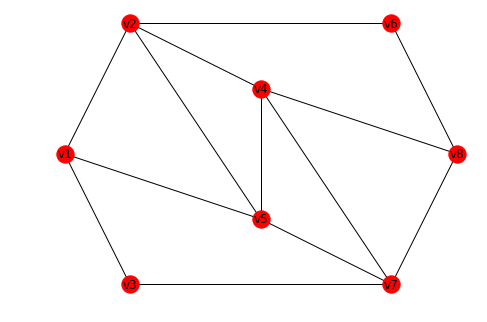

In [2]:
G1 = nx.Graph()
G1.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])
G1.add_edges_from([('v1', 'v2'), ('v1', 'v3'), ('v1', 'v5'), ('v2', 'v4'), ('v2', 'v5'), \
                   ('v2', 'v6'), ('v3', 'v7'), ('v4', 'v5'), ('v4', 'v7'), ('v4', 'v8'), \
                   ('v5', 'v7'), ('v6', 'v8'), ('v7', 'v8')])

pos1 = {'v1': (0, 0), \
        'v2': (5, 10), \
        'v3': (5, -10), \
        'v4': (15, 5), \
        'v5': (15, -5), \
        'v6': (25, 10), \
        'v7': (25,-10), \
        'v8': (30,0)}
nx.draw(G1, pos = pos1, with_labels=True)

In [3]:
# 最大マッチングの計算 (結果は辞書)
nx.max_weight_matching(G1)

{('v1', 'v5'), ('v2', 'v6'), ('v3', 'v7'), ('v8', 'v4')}

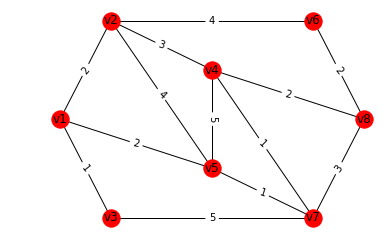

In [4]:
# 辺重み付きグラフの定義と描画
G2 = nx.Graph()
G2.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8'])
G2.add_weighted_edges_from([('v1', 'v2', 2), \
                            ('v1', 'v3', 1), \
                            ('v1', 'v5', 2), \
                            ('v2', 'v4', 3), \
                            ('v2', 'v5', 4), \
                            ('v2', 'v6', 4), \
                            ('v3', 'v7', 5), \
                            ('v4', 'v5', 5), \
                            ('v4', 'v7', 1), \
                            ('v4', 'v8', 2), \
                            ('v5', 'v7', 1), \
                            ('v6', 'v8', 2), \
                            ('v7', 'v8', 3)])
ewd = {}
for e in G2.edges():
    ewd[e] = G2.get_edge_data(*e)['weight']
nx.draw(G2, pos = pos1, edge_labels = nx.draw_networkx_edge_labels(G2, pos=pos1, edge_labels = ewd), with_labels=True)

In [5]:
# 最大重みマッチングの計算 (結果は辞書)
nx.max_weight_matching(G2)

{('v2', 'v6'), ('v3', 'v7'), ('v4', 'v5')}

## 除雪車の運行計画

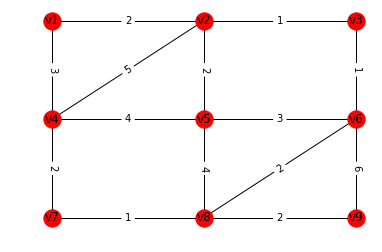

In [6]:
G3 = nx.Graph()
G3.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9'])
G3.add_weighted_edges_from([('v1', 'v2', 2), \
                            ('v1', 'v4', 3), \
                            ('v2', 'v3', 1), \
                            ('v2', 'v4', 5), \
                            ('v2', 'v5', 2), \
                            ('v3', 'v6', 1), \
                            ('v4', 'v5', 4), \
                            ('v4', 'v7', 2), \
                            ('v5', 'v6', 3), \
                            ('v5', 'v8', 4), \
                            ('v6', 'v8', 2), \
                            ('v6', 'v9', 6), \
                            ('v7', 'v8', 1), \
                            ('v8', 'v9', 2)])
mypos3 = {'v1': (0, 20), \
          'v2': (10, 20), \
          'v3': (20, 20), \
          'v4': (0, 10), \
          'v5': (10, 10), \
          'v6': (20, 10), \
          'v7': (0, 0), \
          'v8': (10, 0), \
          'v9': (20, 0)}
ewd3 = {}
for e in G3.edges():
    ewd3[e] = G3.get_edge_data(*e)['weight']
nx.draw(G3, pos = mypos3, edge_labels = nx.draw_networkx_edge_labels(G3, pos = mypos3, edge_labels = ewd3), with_labels = True)

In [7]:
# オイラー回路を持つか判定
nx.is_eulerian(G3)

True

In [8]:
# オイラー回路の辺を順に出力
for e in nx.eulerian_circuit(G3):
    print(e)

('v1', 'v4')
('v4', 'v5')
('v5', 'v2')
('v2', 'v4')
('v4', 'v7')
('v7', 'v8')
('v8', 'v5')
('v5', 'v6')
('v6', 'v9')
('v9', 'v8')
('v8', 'v6')
('v6', 'v3')
('v3', 'v2')
('v2', 'v1')


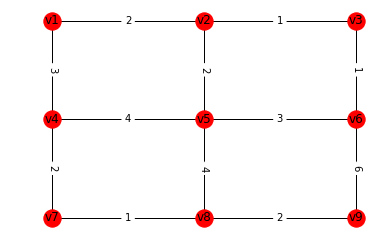

In [9]:
G4 = nx.Graph()
G4.add_nodes_from(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9'])
G4.add_weighted_edges_from([('v1', 'v2', 2), \
                            ('v1', 'v4', 3), \
                            ('v2', 'v3', 1), \
                            ('v2', 'v5', 2), \
                            ('v3', 'v6', 1), \
                            ('v4', 'v5', 4), \
                            ('v4', 'v7', 2), \
                            ('v5', 'v6', 3), \
                            ('v5', 'v8', 4), \
                            ('v6', 'v9', 6), \
                            ('v7', 'v8', 1), \
                            ('v8', 'v9', 2)])
ewd4 = {}
for e in G4.edges():
    ewd4[e] = G4.get_edge_data(*e)['weight']
nx.draw(G4, pos = mypos3, edge_labels = nx.draw_networkx_edge_labels(G4, pos = mypos3, edge_labels = ewd4), with_labels = True)

In [10]:
nx.is_eulerian(G4)

False

In [11]:
nx.degree(G4)

DegreeView({'v1': 2, 'v2': 3, 'v3': 2, 'v4': 3, 'v5': 4, 'v6': 3, 'v7': 2, 'v8': 3, 'v9': 2})

In [12]:
# 次数が奇数である頂点だけを抽出する
odd_degree_vertices = []
for v in G4.nodes():
    if nx.degree(G4)[v] % 2 != 0:
        odd_degree_vertices.append(v)
print(odd_degree_vertices)

['v2', 'v4', 'v6', 'v8']


In [13]:
# 次数が奇数である頂点だけからなる完全グラフの辺集合を作成
# ここで itertools を使用
elist = []
for e in itertools.combinations(odd_degree_vertices, 2):
    elist.append([e[0], e[1], nx.shortest_path_length(G4, source=e[0], target=e[1], weight='weight')])
print(elist)

[['v2', 'v4', 5], ['v2', 'v6', 2], ['v2', 'v8', 6], ['v4', 'v6', 7], ['v4', 'v8', 3], ['v6', 'v8', 7]]


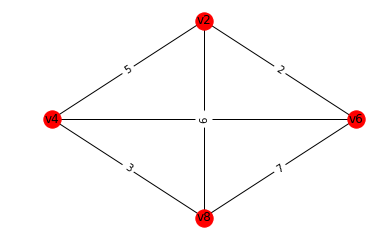

In [14]:
# 次数が奇数である頂点だけからなる完全グラフの作成
G5 = nx.Graph()
G5.add_nodes_from(odd_degree_vertices)
G5.add_weighted_edges_from(elist)
ewd5 = {}
for e in G5.edges():
    ewd5[e] = G5.get_edge_data(*e)['weight']
nx.draw(G5, pos=mypos3, edge_labels = nx.draw_networkx_edge_labels(G5, pos = mypos3, edge_labels = ewd5), with_labels = True)

In [15]:
# 辺重みの最大値の計算
maxweight = 0
for e in G5.edges():
    tw = G5.get_edge_data(*e)['weight']
    if maxweight < tw:
        maxweight = tw
maxweight

7

[['v2', 'v4', 3], ['v2', 'v6', 6], ['v2', 'v8', 2], ['v4', 'v6', 1], ['v4', 'v8', 5], ['v6', 'v8', 1]]


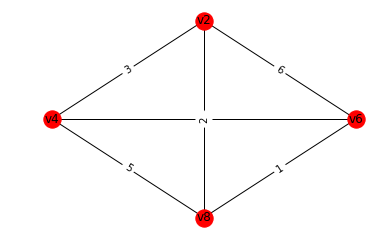

In [16]:
# 最小重み完全マッチング問題を最大重みマッチング問題に変換
G6 = nx.Graph()
G6.add_nodes_from(odd_degree_vertices)
elist6 = []
for e in itertools.combinations(odd_degree_vertices, 2):
    elist6.append([e[0], e[1], maxweight - nx.shortest_path_length(G4, source=e[0], target=e[1], weight='weight') + 1])
print(elist6)
G6.add_weighted_edges_from(elist6)
ewd6 = {}
for e in G6.edges():
    ewd6[e] = G6.get_edge_data(*e)['weight']
nx.draw(G6, pos=mypos3, edge_labels = nx.draw_networkx_edge_labels(G6, pos = mypos3, edge_labels = ewd6), with_labels = True)

In [17]:
# 最大重みマッチングの計算
nx.max_weight_matching(G6)

{('v2', 'v6'), ('v8', 'v4')}